<h1>Task 3</h1>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("cleaned_data/cleaned_data.csv")

<h3>1-Exploratory Data Analysis (EDA):</h3>

In [6]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
od_dif_hr                           0
vehicle_type                        0
dtype: int64


In [7]:
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
        start_scan_to_end_scan  actual_distance_to_destination    actual_time  \
count           144867.000000                   144867.000000  144867.000000   
mean               961.262986                      234.073372     416.927527   
std               1037.012769                      344.990009     598.103621   
min                 20.000000                        9.000045       9.000000   
25%                161.000000                       23.355874      51.000000   
50%                449.000000                       66.126571     132.000000   
75%               1634.000000                      286.708875     513.000000   
max               7898.000000                     1927.447705    4532.000000   

           osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
count  144867.000000  144867.000000        144867.000000      144867.000000   
mean      213.868272     284.771297            36.196111          18.507548   
std       308.011085 

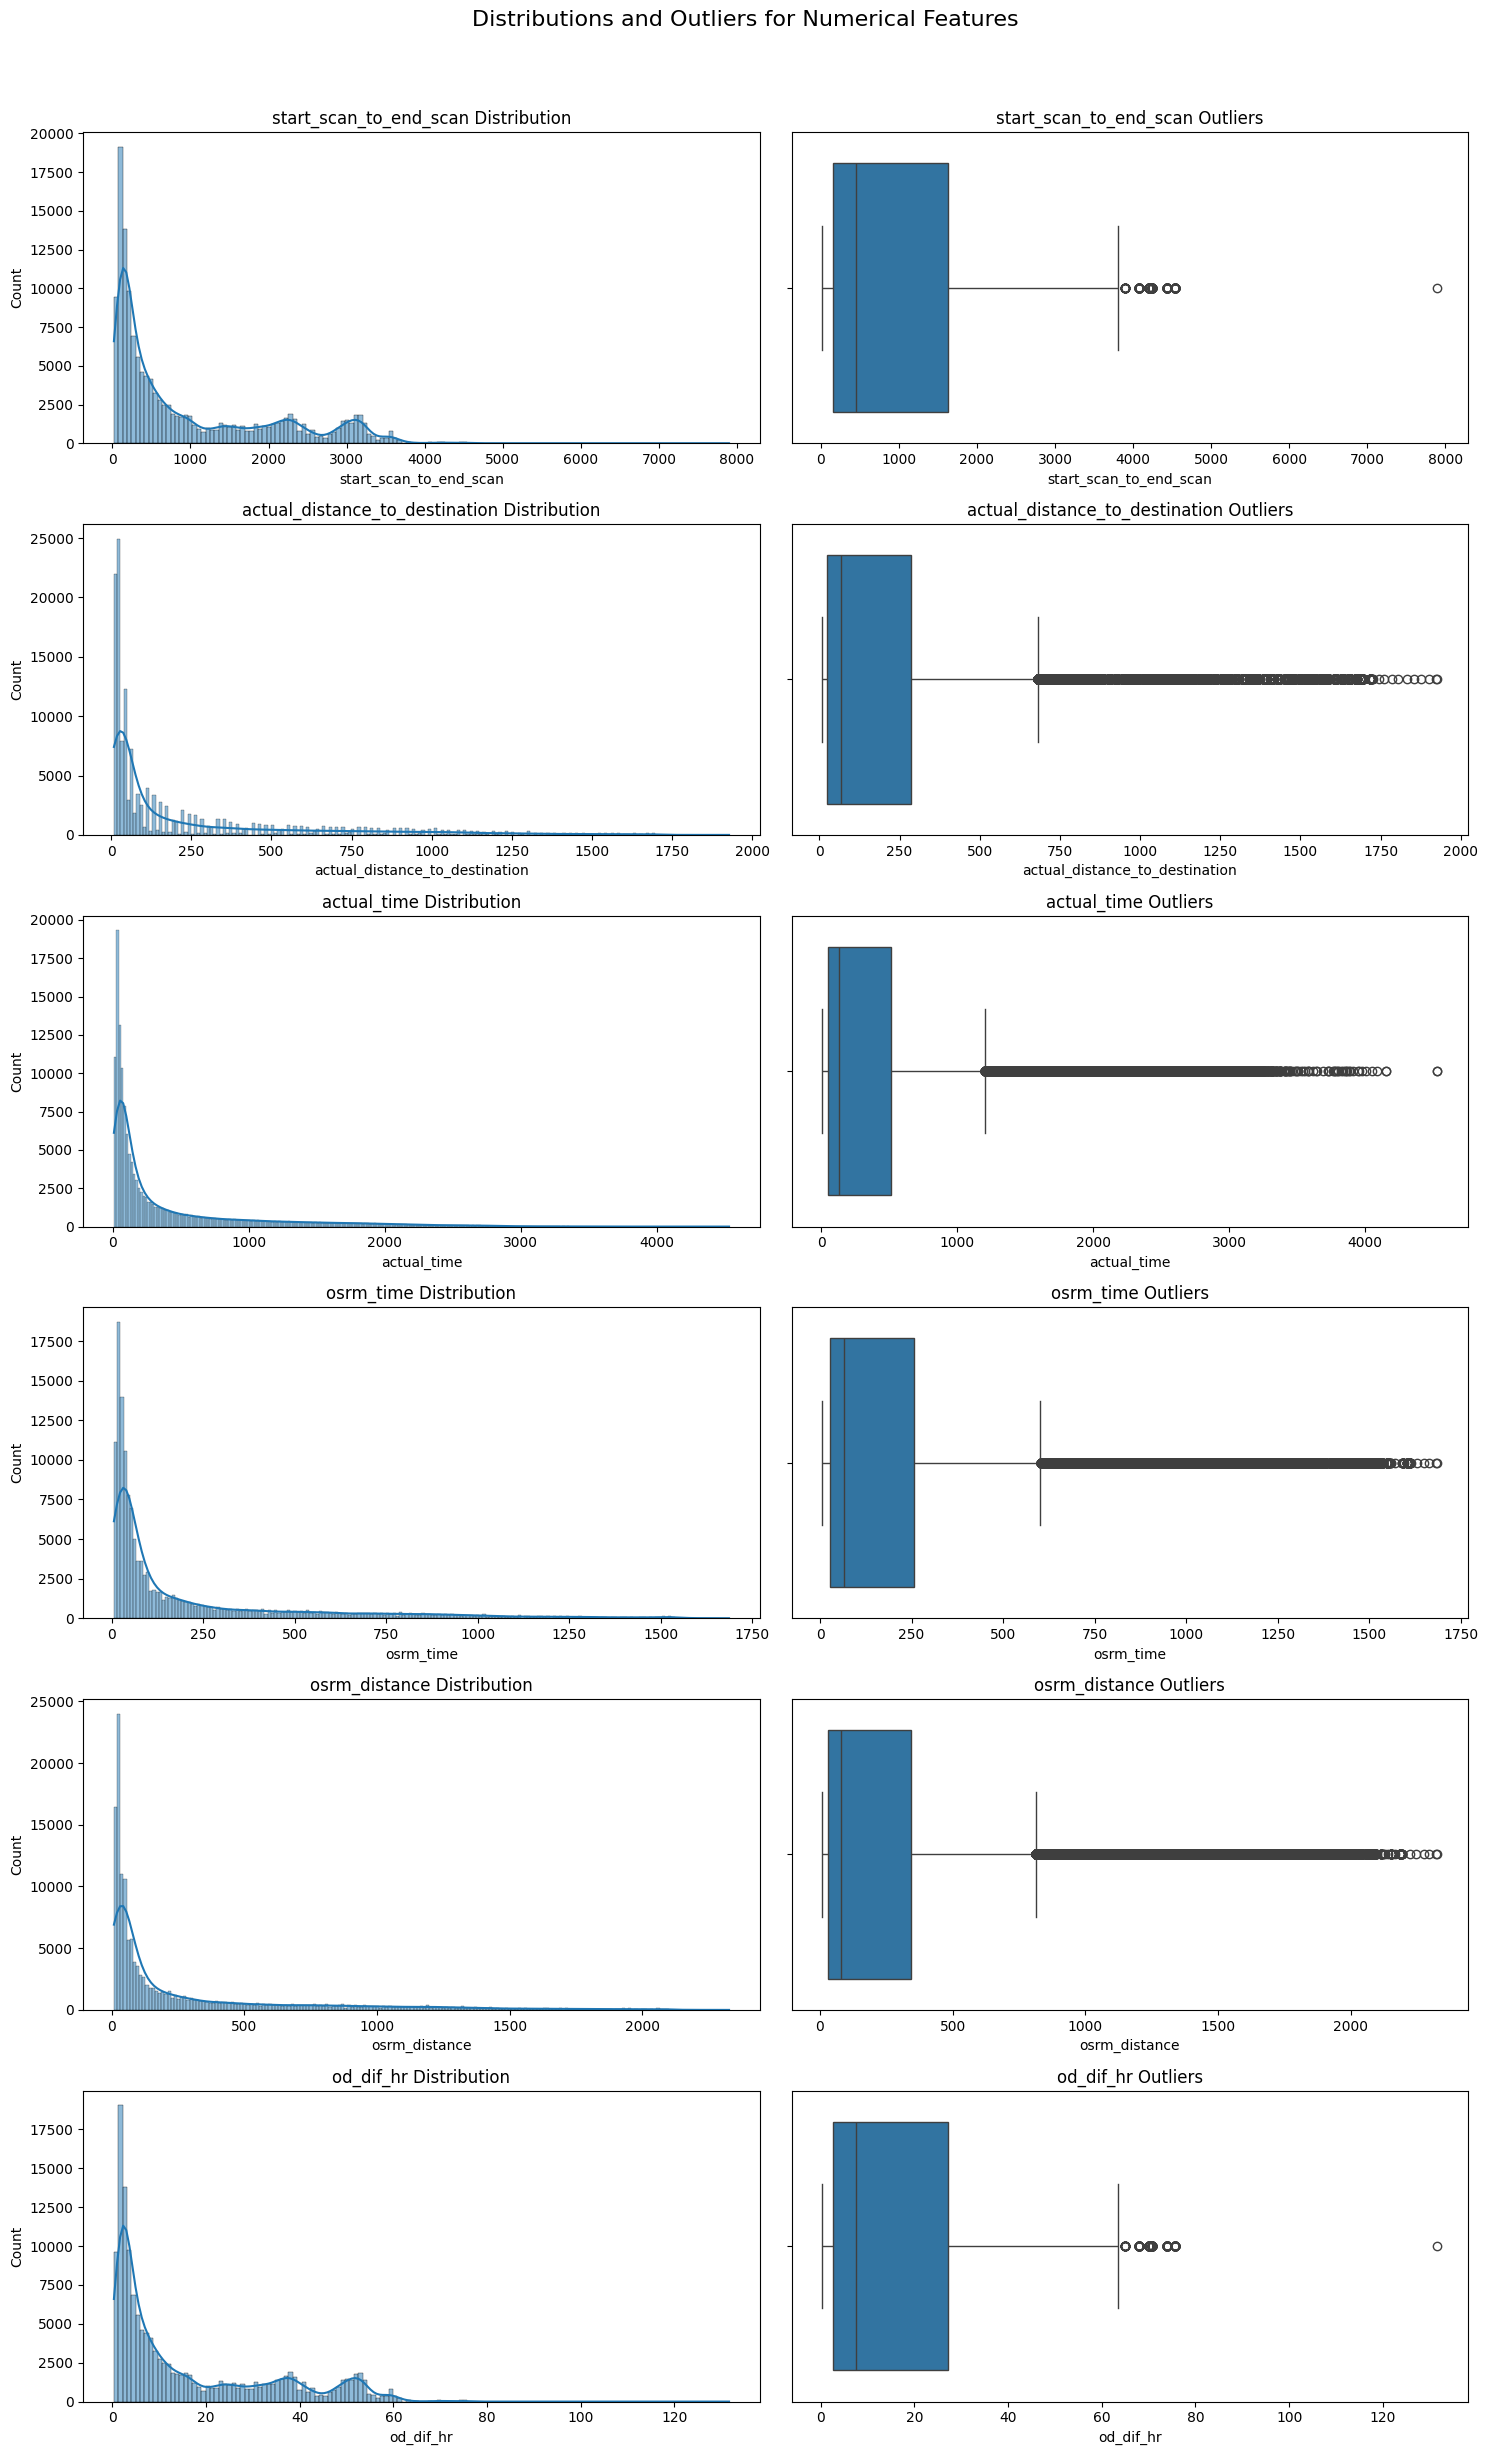

In [8]:
# Plot distributions and outliers for numerical features
numerical_features = [
    'start_scan_to_end_scan', 'actual_distance_to_destination', 
    'actual_time', 'osrm_time', 'osrm_distance', 'od_dif_hr'
]
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 25))
fig.suptitle('Distributions and Outliers for Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} Distribution')

    # Box plot for outliers
    sns.boxplot(x=df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Outliers')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h3>2-Univariate Data Analysis:</h3>

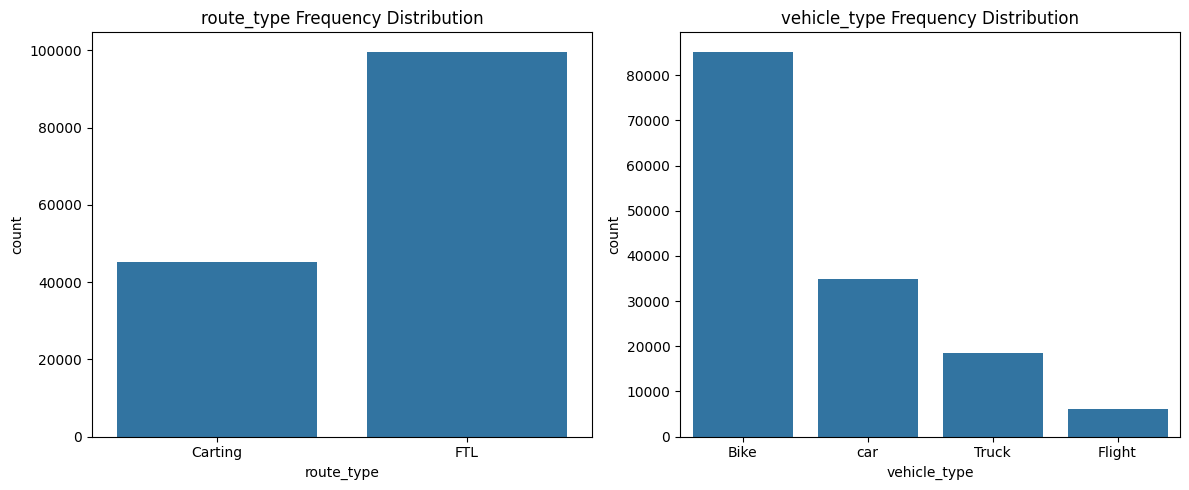

In [9]:
categorical_features = ['route_type', 'vehicle_type']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(12, 5))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature} Frequency Distribution')

plt.tight_layout()
plt.show()

<h3>3-Bivariate Data Analysis:</h3>

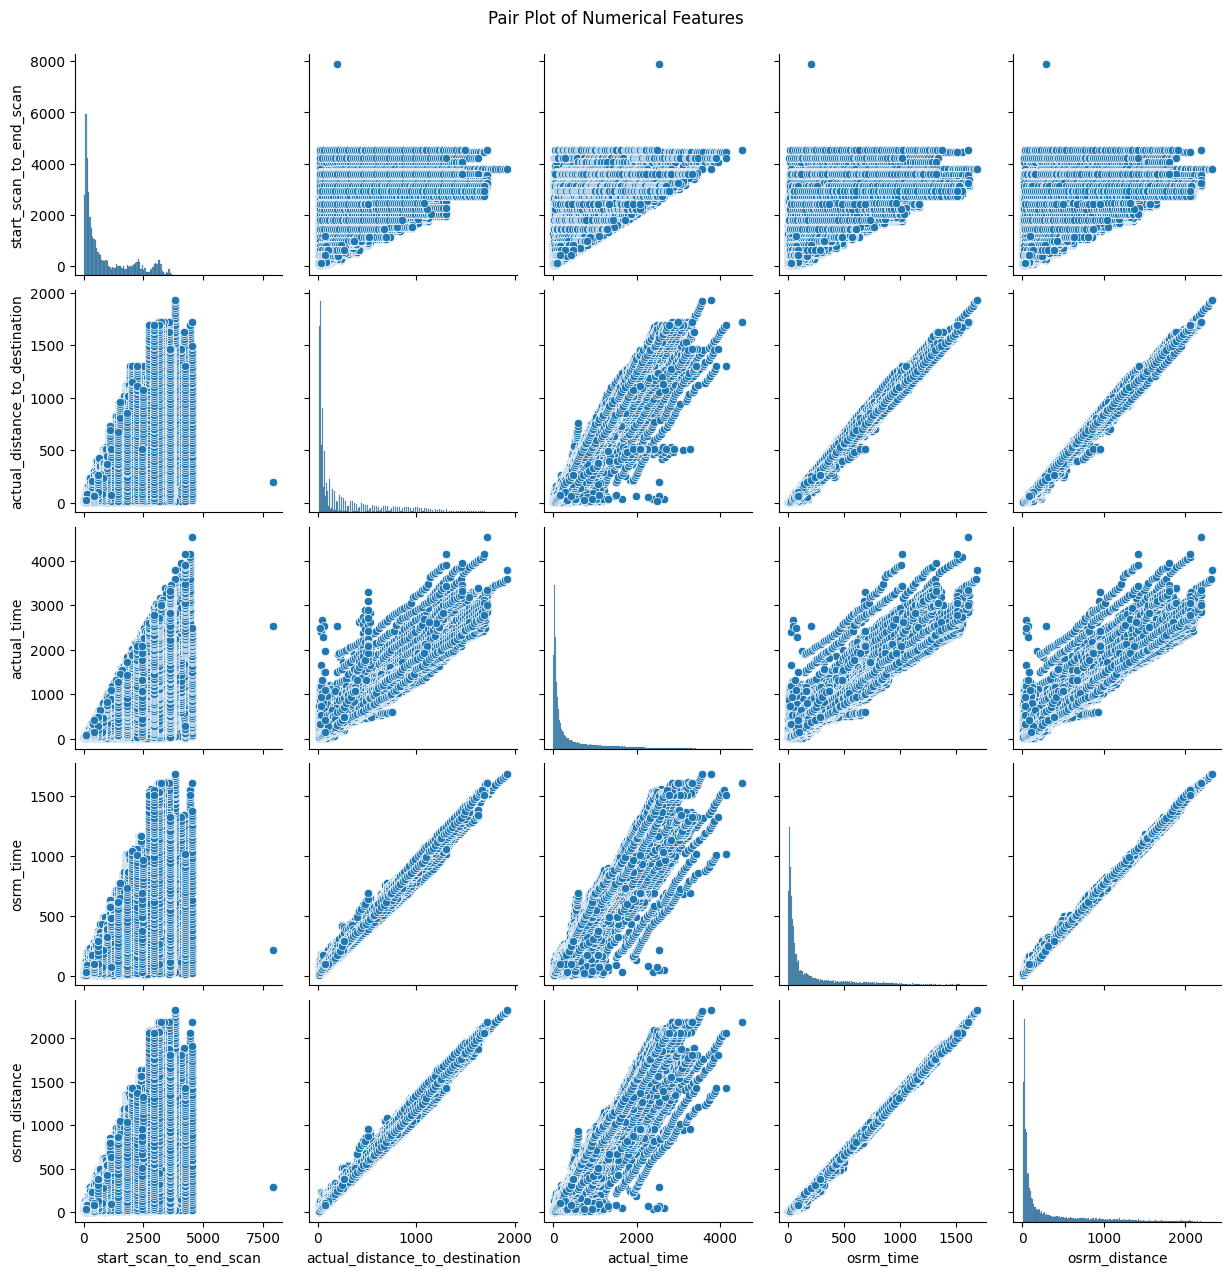

Pearson Correlation Matrix:
                                 start_scan_to_end_scan  \
start_scan_to_end_scan                        1.000000   
actual_distance_to_destination                0.785006   
actual_time                                   0.785937   
osrm_time                                     0.785298   
osrm_distance                                 0.784138   

                                actual_distance_to_destination  actual_time  \
start_scan_to_end_scan                                0.785006     0.785937   
actual_distance_to_destination                        1.000000     0.978659   
actual_time                                           0.978659     1.000000   
osrm_time                                             0.995872     0.977998   
osrm_distance                                         0.997149     0.979399   

                                osrm_time  osrm_distance  
start_scan_to_end_scan           0.785298       0.784138  
actual_distance_to_destinatio

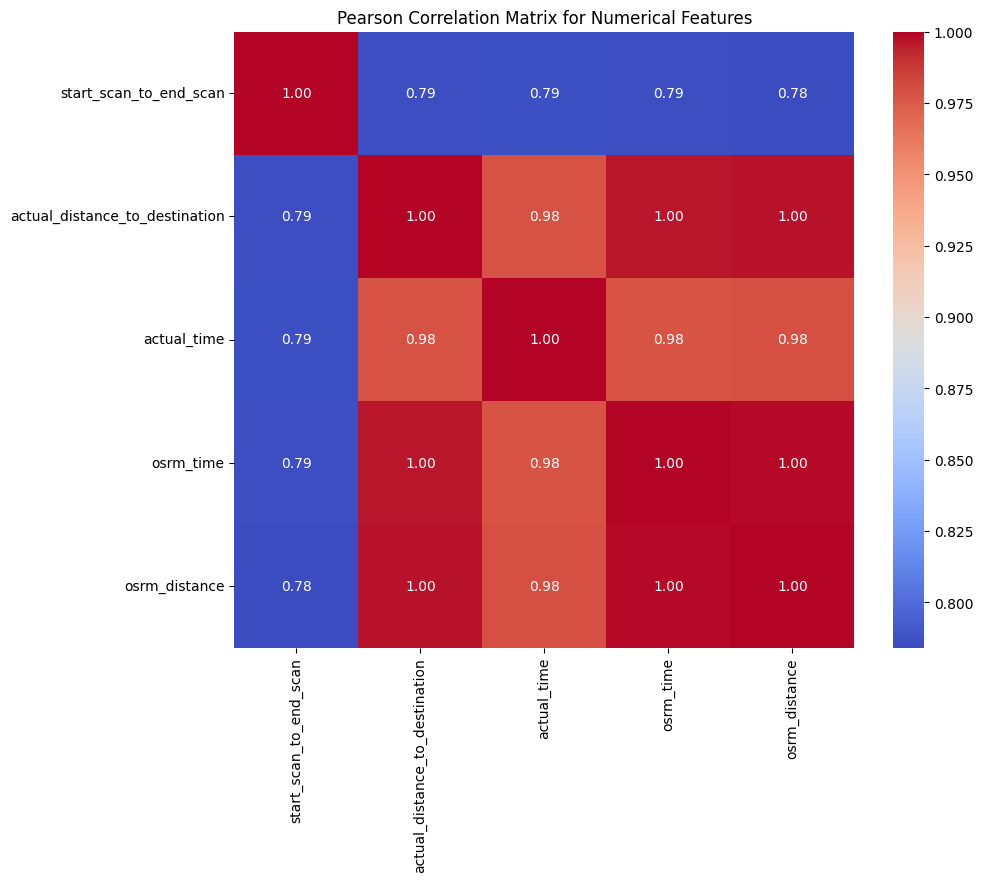

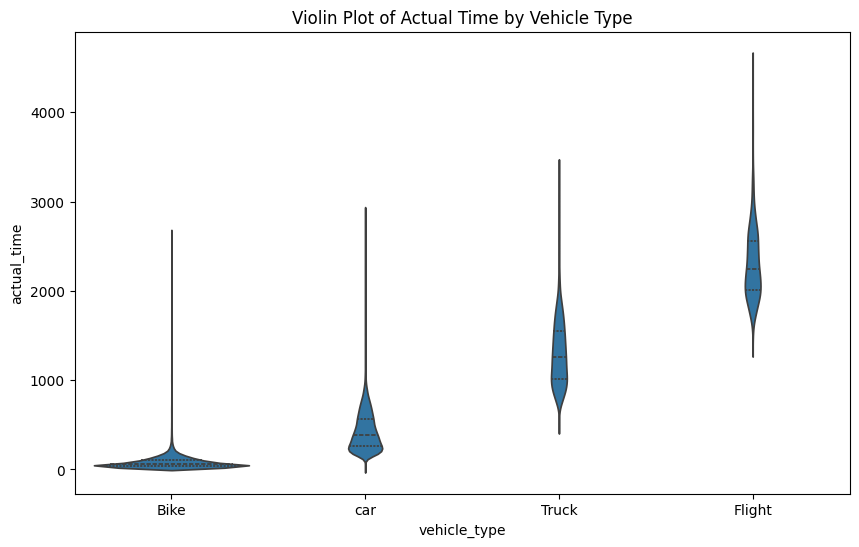

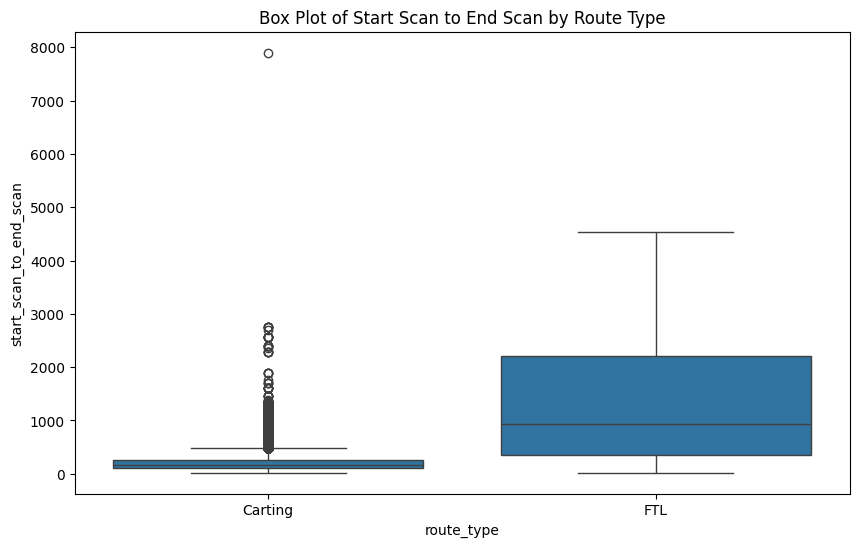

In [14]:
numerical_features = ['start_scan_to_end_scan', 'actual_distance_to_destination', 
                      'actual_time', 'osrm_time', 'osrm_distance']

# Pair plot for numerical features (for small subsets)
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Step 2: Correlation Coefficients (Pearson and Spearman)
# Compute both Pearson and Spearman correlation matrices
pearson_corr = df[numerical_features].corr(method='pearson')
spearman_corr = df[numerical_features].corr(method='spearman')

# Display correlation matrices
print("Pearson Correlation Matrix:\n", pearson_corr)
print("\nSpearman Correlation Matrix:\n", spearman_corr)

# Visualize the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix for Numerical Features")
plt.show()

# Step 3: Relationship between Numerical and Categorical Features
# Violin plot of a numerical feature ('actual_time') against a categorical feature ('vehicle_type')
plt.figure(figsize=(10, 6))
sns.violinplot(x='vehicle_type', y='actual_time', data=df, inner='quartile')
plt.title('Violin Plot of Actual Time by Vehicle Type')
plt.show()

# Box plot for another numerical-categorical pair ('start_scan_to_end_scan' by 'route_type')
plt.figure(figsize=(10, 6))
sns.boxplot(x='route_type', y='start_scan_to_end_scan', data=df)
plt.title('Box Plot of Start Scan to End Scan by Route Type')
plt.show()


<h3>4-Multivariate Data Analysis:</h3>

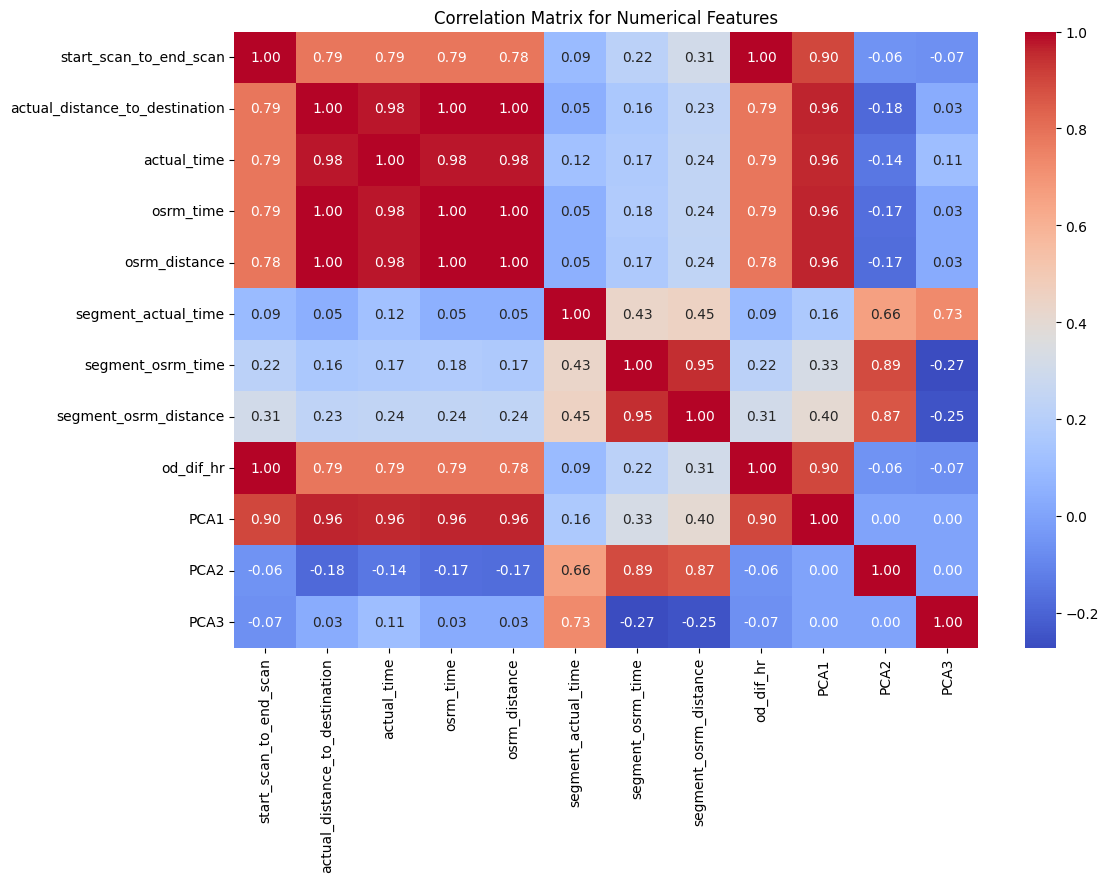

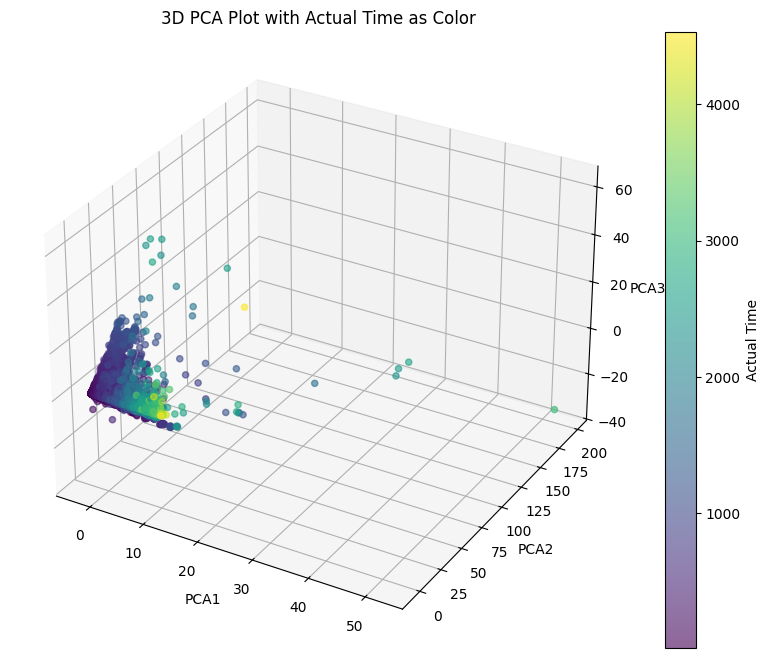

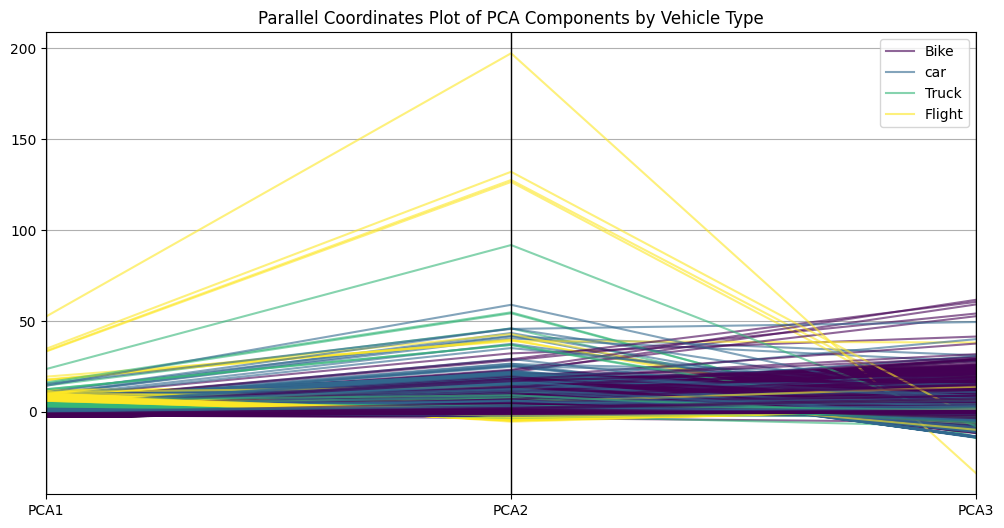

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

# Load dataset


# Filter numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Step 1: Correlation Matrix (Heatmap)
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Step 2: Dimensionality Reduction with PCA
# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA to reduce dimensions to 3 for 3D visualization
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Add the PCA results to the dataset for easier plotting
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

# Step 3: 3D Plot of PCA Results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['actual_time'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Actual Time')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("3D PCA Plot with Actual Time as Color")
plt.show()

# Step 4: Parallel Coordinates Plot
# Select a subset of data for parallel coordinates plot
parallel_data = df[['PCA1', 'PCA2', 'PCA3', 'vehicle_type']]
plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, class_column='vehicle_type', colormap='viridis', alpha=0.6)
plt.title("Parallel Coordinates Plot of PCA Components by Vehicle Type")
plt.show()